## Data Modeling

The final dataset with imputed values was used for compute the model. Decision Tree and Random forest with feature importance were used to identify the micronutrients that that were contributing more to the model. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
NHANES_final_df = pd.read_excel('NHANES_final.xlsx')

In [6]:
NHANES_final_df.head()

,Unnamed: 0,ID,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,...,VitB12(pmol/L),VitB6,VitD2,VitD3,VitD(nmol/L),VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI
0,0,62161,1,264,3,2,5.1,27.0,60.1,1.4,...,433.773755,67.521150,2.663838,63.171397,62.501099,55.031690,23.094371,1.934913,78.806135,25.278573
1,1,62162,2,36,1,2,17.6,55.5,36.9,9.8,...,305.638010,58.298489,2.663838,57.910763,58.088403,56.746678,25.721783,1.879215,15.315418,19.184786
2,2,62163,1,168,5,2,5.1,44.9,36.1,2.3,...,491.752859,64.087567,2.663838,58.859214,57.674557,56.740853,24.347905,1.735641,54.541704,20.749270
3,3,62164,2,528,3,2,5.6,27.2,58.7,1.5,...,412.708814,67.782671,3.304100,65.194235,62.029226,56.558531,27.660877,1.885412,73.885622,27.443223
4,4,62165,2,168,4,2,7.5,34.8,54.3,2.6,...,465.521054,54.961042,2.663838,54.836202,52.331585,57.978798,21.237162,1.598063,66.977157,26.189044


In [7]:
NHANES_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82741 entries, 0 to 82740
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82741 non-null  int64  
 1   ID                    82741 non-null  int64  
 2   Gender                82741 non-null  int64  
 3   Age(Months)           82741 non-null  int64  
 4   Race                  82741 non-null  int64  
 5   PregnStat             82741 non-null  int64  
 6   White_Cell_num        82741 non-null  float64
 7   Lymphocyte(%)         82741 non-null  float64
 8   SegNeutrophil(%)      82741 non-null  float64
 9   Lymphocyte_num        82741 non-null  float64
 10  SegNeutrophil_num     82741 non-null  float64
 11  HIV                   82741 non-null  int64  
 12  alco_dks_daily#       82741 non-null  int64  
 13  smokescigs_daily#     82741 non-null  int64  
 14  had_anemia_treatment  82741 non-null  int64  
 15  had_cancer         

In [8]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [9]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  


# Model 1: Entropy model - no max_depth

In [10]:
from sklearn.model_selection import train_test_split

X = NHANES_final_df[['Gender',
        'Age(Months)',
        'Race',
        'PregnStat',
        'HIV',
        'alco_dks_daily#',
        'smokescigs_daily#',
        'had_anemia_treatment',
        'had_cancer',
        'Cu(umol/L)',
        'Se(umol/L)',
        'Zn(umol/L)',
        'Fe(ug/L)',
        'Folate(nmol/L)',
        'VitB12(pmol/L)',
        'VitB6',
        'VitD2',
        'VitD3',
        'VitD(nmol/L)',
        'VitC(umol/L)',
        'VitE(umol/L)',
        'VitA(umol/L)',
        'Weight',
        'BMI']]

y = NHANES_final_df['immunity_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
NHANES_final_df['immunity_strength'].unique()

array([2, 1])

In [12]:
# entropy DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)


entr_model.fit(X_train, y_train)

y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [13]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Entropy - no max depth
Accuracy: 0.8947750070499134
Balanced accuracy: 0.8881924971149796
Precision score for "1" 0.9159489736450172
Precision score for "2" 0.8599147121535181
Recall score for "1" 0.9150009703085581
Recall score for "2" 0.8613840239214011


Text(0.5, 0, 'Permutation Importance')

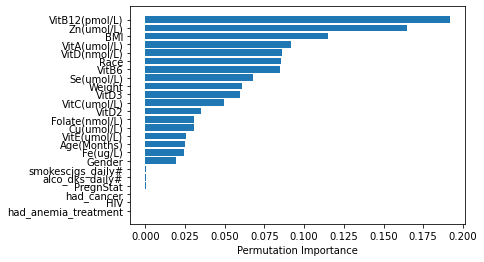

In [14]:

perm_importance = permutation_importance(entr_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Model 2: Gini impurity model - no max_depth

In [15]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# fit the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)
# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

In [16]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Gini impurity model
Accuracy: 0.8913507634049067
Balanced accuracy: 0.8849590851152236
Precision score for "1" 0.9142430537522721
Precision score for "2" 0.8539123049155961
Recall score for "1" 0.910990361601656
Recall score for "2" 0.8589278086287911


Text(0.5, 0, 'Permutation Importance')

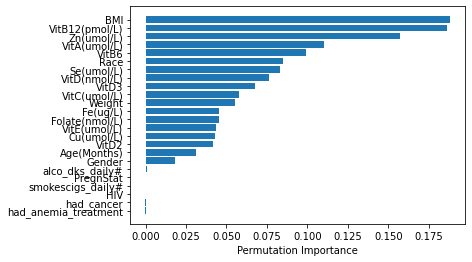

In [17]:
perm_importance = permutation_importance(gini_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Model 3: Entropy model - max depth 3

In [18]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [19]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Entropy model max depth 3
Accuracy: 0.671393465737421
Balanced accuracy: 0.6329323000949529
Precision score for "1" 0.7133839859731151
Precision score for "2" 0.5782445222351873
Recall score for "1" 0.7895724173620544
Recall score for "2" 0.47629218282785135


Text(0.5, 0, 'Permutation Importance')

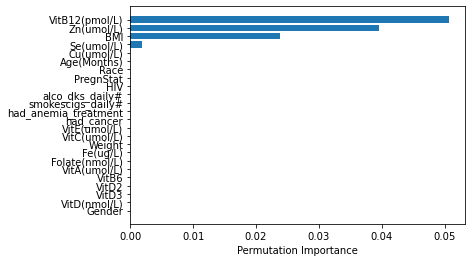

In [20]:
perm_importance = permutation_importance(entr_model2, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Model 4: Gini impurity model - max depth 3

In [21]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [22]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Gini impurity  model - max depth 3
Accuracy: 0.6739314345566612
Balanced accuracy: 0.6359804616358675
Precision score for "1" 0.7156409205363939
Precision score for "2" 0.581977794990963
Recall score for "1" 0.7905427259201759
Recall score for "2" 0.48141819735155916


Text(0.5, 0, 'Permutation Importance')

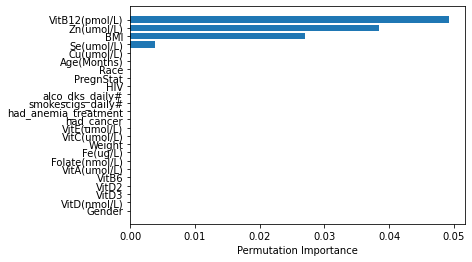

In [23]:
perm_importance = permutation_importance(gini_model2, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Random Forest max depth 3

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1234)
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
firstRFModel

RandomForestClassifier(max_depth=3, random_state=1234)

In [26]:
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model - max depth 3
Accuracy: 0.6998751158200056
Balanced accuracy: 0.6217575625970602
Precision score for "1" 0.6902284927081849
Precision score for "2" 0.753711558854719
Recall score for "1" 0.9399055566336761
Recall score for "2" 0.30360956856044424


Text(0.5, 0, 'Permutation Importance')

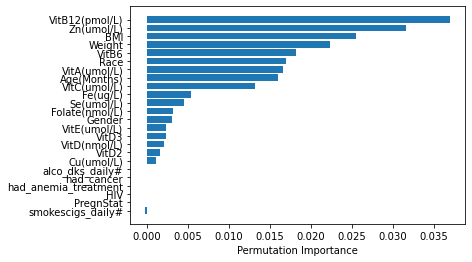

In [27]:
perm_importance = permutation_importance(firstRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Random Forest max depth 3

In [73]:
# Second model max_depth 3
secondRFModel = RandomForestClassifier(max_depth= 4, random_state= 1234)
secondRFModel.fit(X_train, y_train)

y_pred = secondRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
secondRFModel

RandomForestClassifier(max_depth=4, random_state=1234)

In [29]:
print("Random Forest  model - max depth 4")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model - max depth 4
Accuracy: 0.7261410788381742
Balanced accuracy: 0.6665505660630637
Precision score for "1" 0.7226363683101126
Precision score for "2" 0.7388309754281459
Recall score for "1" 0.9092438061970374
Recall score for "2" 0.42385732592909015


Text(0.5, 0, 'Permutation Importance')

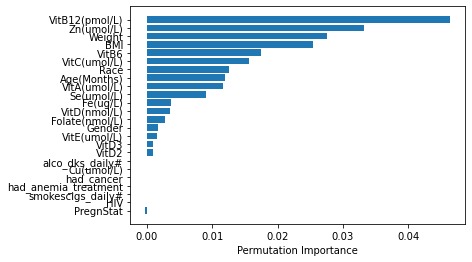

In [30]:
perm_importance = permutation_importance(secondRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
# Plug in appropriate max_depth and random_state parameters 
thirdRFModel = RandomForestClassifier(max_depth= 10, random_state= 1234)
thirdRFModel.fit(X_train, y_train)

y_pred = thirdRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
thirdRFModel

RandomForestClassifier(max_depth=10, random_state=1234)

In [32]:
print("Random Forest  model - max depth 10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model - max depth 10
Accuracy: 0.8688313257865689
Balanced accuracy: 0.8633001000925158
Precision score for "1" 0.9018109976950939
Precision score for "2" 0.8168707200664038
Recall score for "1" 0.8858270263277055
Recall score for "2" 0.840773173857326


Text(0.5, 0, 'Permutation Importance')

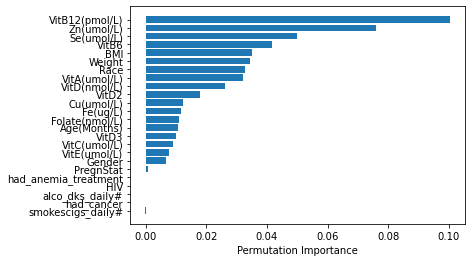

In [33]:
perm_importance = permutation_importance(thirdRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [34]:
# Plug in appropriate n_estimators=10, and random_state parameters 
thirdRFModel = RandomForestClassifier(n_estimators=10, random_state= 1234)
thirdRFModel.fit(X_train, y_train)

y_pred = thirdRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
thirdRFModel

RandomForestClassifier(n_estimators=10, random_state=1234)

In [35]:
print("Random Forest  model -n_estimators=10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model -n_estimators=10
Accuracy: 0.9174153003263102
Balanced accuracy: 0.9078853811237447
Precision score for "1" 0.9227034865393102
Precision score for "2" 0.9080562374469985
Recall score for "1" 0.9466977165405266
Recall score for "2" 0.8690730457069629


Text(0.5, 0, 'Permutation Importance')

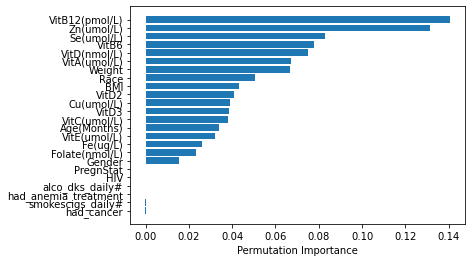

In [36]:
perm_importance = permutation_importance(thirdRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [37]:
# Plug in appropriate n_estimators=10,max_depth=10 and random_state parameters 
thirdRFModel = RandomForestClassifier(criterion = 'entropy', n_estimators=250, max_depth=25, random_state= 1234)
thirdRFModel.fit(X_train, y_train)

y_pred = thirdRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
thirdRFModel

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=250,
                       random_state=1234)

In [38]:
print("Random Forest  model -n_estimators=10 max_depth=10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model -n_estimators=10 max_depth=10
Accuracy: 0.9358659307899931
Balanced accuracy: 0.9333091509174245
Precision score for "1" 0.9528443602638625
Precision score for "2" 0.9085365853658537
Recall score for "1" 0.943722103628954
Recall score for "2" 0.922896198205895


Text(0.5, 0, 'Permutation Importance')

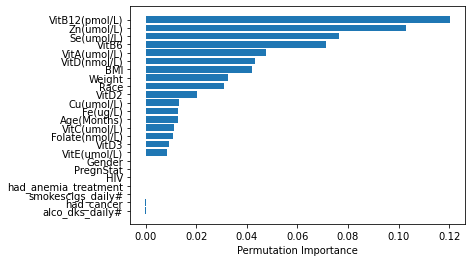

In [39]:
perm_importance = permutation_importance(thirdRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## RandomForest Gridsearch

In [40]:
rfc = RandomForestClassifier(random_state= 1234)

grid_params = {
    'n_estimators': [10, 100, 150, 200, 250, 300, 350],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'criterion' :['gini', 'entropy']
}

rf_grid_cv = GridSearchCV(estimator=rfc, param_grid=grid_params, cv=5, verbose=3)

%time rf_grid_cv.fit(X_train, y_train)

print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.746 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.743 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.752 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.748 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.744 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.758 total time=   4.8s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.759 total time=   4.6s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.759 total time=   4.9s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.761 total time=   4.6s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.765 total time=   4.9s
[CV 1/5] END criterion=

[CV 4/5] END criterion=gini, max_depth=15, n_estimators=200;, score=0.912 total time=  20.6s
[CV 5/5] END criterion=gini, max_depth=15, n_estimators=200;, score=0.916 total time=  20.6s
[CV 1/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.915 total time=  25.5s
[CV 2/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.910 total time=  25.7s
[CV 3/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.910 total time=  26.0s
[CV 4/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.912 total time=  39.8s
[CV 5/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.915 total time=  25.7s
[CV 1/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.914 total time=42.8min
[CV 2/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.909 total time=23.8min
[CV 3/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.911 total time=  59.5s
[CV 4/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.

[CV 3/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.913 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.914 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.913 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.932 total time=  11.7s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.930 total time=  11.5s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.928 total time=  11.6s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.931 total time=  11.8s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.930 total time=  11.7s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.934 total time=  17.8s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.930 total time=  17.5s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.929

[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.859 total time=  22.3s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.861 total time=  27.8s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.855 total time=  27.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.858 total time=  27.7s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.858 total time=  27.7s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.859 total time=  27.9s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.861 total time=  33.2s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.855 total time=  33.3s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.857 total time=  33.3s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.858 total time=  33.3s
[CV 5/5] END criterion=entropy, max_dept

[CV 1/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.918 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.914 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.914 total time= 7.6min
[CV 4/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.915 total time=   6.9s
[CV 5/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.918 total time=   4.6s
[CV 1/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.933 total time=  17.2s
[CV 2/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.929 total time=  17.2s
[CV 3/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.928 total time=  16.6s
[CV 4/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.931 total time=  16.1s
[CV 5/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.932 total time=  16.4s
[CV 1/5] END criterion=entropy, max_depth=25,

In [66]:

X = NHANES_final_df[['Gender',
        'Age(Months)',
        'Race',
        'PregnStat',
        'HIV',
        'alco_dks_daily#',
        'smokescigs_daily#',
        'had_anemia_treatment',
        'had_cancer',
        'Cu(umol/L)',
        'Se(umol/L)',
        'Zn(umol/L)',
        'Fe(ug/L)',
        'Folate(nmol/L)',
        'VitB12(pmol/L)',
        'VitB6',
        'VitD2',
        'VitD3',
        'VitD(nmol/L)',
        'VitC(umol/L)',
        'VitE(umol/L)',
        'VitA(umol/L)',
        'Weight',
        'BMI']]

y = NHANES_final_df['immunity_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
best_model = RandomForestClassifier(criterion = 'entropy', n_estimators=350, max_depth=30, random_state= 1234)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred = pd.Series(y_pred)
best_model

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=350,
                       random_state=1234)

In [71]:
print("Random Forest  model bestestimator")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))


Random Forest  model bestestimator
Accuracy: 0.9377996213189381
Balanced accuracy: 0.9349669064405084
Precision score for "1" 0.9532868590787673
Precision score for "2" 0.9127084652733798
Recall score for "1" 0.9465036548289023
Recall score for "2" 0.9234301580521145


Text(0.5, 0, 'Permutation Importance')

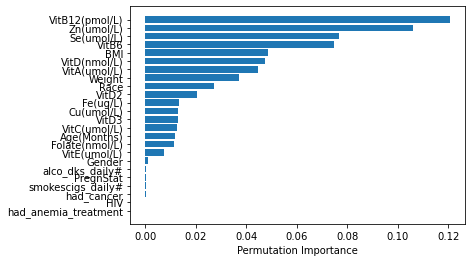

In [72]:

perm_importance = permutation_importance(best_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Conclusion

In [ ]:
The top features that consistently show are Vitamin B12 and Zn 

## IGNORE THE REST

In [46]:
ZnSeCu_df = pd.read_csv('ZnSeCu_merged.csv')

In [47]:
ZnSeCu_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62168.0,7.0,1,6.0,72.0,5,2,23.6,15.4,0.0,...,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,62169.0,7.0,1,21.0,252.0,5,2,54.6,20.1,2.0,...,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,62170.0,7.0,1,15.0,180.0,5,2,63.5,18.2,0.0,...,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,62171.0,7.0,1,14.0,168.0,1,2,58.2,19.9,0.0,...,55.75,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,62172.0,7.0,2,43.0,516.0,4,2,98.6,33.3,3.0,...,35.13,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [48]:
ZnSeCu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7259 non-null   float64
 1   Yr_Cycle              7259 non-null   float64
 2   Gender                7259 non-null   int64  
 3   Age(yr)               7259 non-null   float64
 4   Age(Months)           7259 non-null   float64
 5   Race                  7259 non-null   int64  
 6   PregnStat             7259 non-null   int64  
 7   Weight                7184 non-null   float64
 8   BMI                   7176 non-null   float64
 9   alco_dks_daily#       7259 non-null   float64
 10  smokescigs_daily#     7259 non-null   float64
 11  had_anemia_treatment  2326 non-null   float64
 12  had_cancer            1645 non-null   float64
 13  cancertype1           135 non-null    float64
 14  cancertype2           12 non-null     float64
 15  cancertype3          

In [49]:
znsecu_feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitD2',
                'VitD3',
                'Weight',
                'BMI',
                'immunity_strength']

In [50]:
ZnSeCu_df = ZnSeCu_df[znsecu_feature_names]

In [51]:
ZnSeCu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                7259 non-null   int64  
 1   Age(Months)           7259 non-null   float64
 2   Race                  7259 non-null   int64  
 3   PregnStat             7259 non-null   int64  
 4   HIV                   3706 non-null   float64
 5   alco_dks_daily#       7259 non-null   float64
 6   smokescigs_daily#     7259 non-null   float64
 7   had_anemia_treatment  2326 non-null   float64
 8   had_cancer            1645 non-null   float64
 9   Cu(umol/L)            7259 non-null   float64
 10  Se(umol/L)            7259 non-null   float64
 11  Zn(umol/L)            7258 non-null   float64
 12  Fe(ug/L)              641 non-null    float64
 13  Folate(nmol/L)        7208 non-null   float64
 14  VitB12(pmol/L)        3390 non-null   float64
 15  VitD2                

In [52]:
ZnSeCu_df['HIV'].fillna(ZnSeCu_df['HIV'].median(),inplace=True)
ZnSeCu_df['had_anemia_treatment'].fillna(ZnSeCu_df['had_anemia_treatment'].median(),inplace=True)
ZnSeCu_df['had_cancer'].fillna(ZnSeCu_df['had_cancer'].median(),inplace=True)
ZnSeCu_df2 = ZnSeCu_df.drop(['Fe(ug/L)', 'VitB12(pmol/L)'], axis=1)

In [53]:
ZnSeCu_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                7259 non-null   int64  
 1   Age(Months)           7259 non-null   float64
 2   Race                  7259 non-null   int64  
 3   PregnStat             7259 non-null   int64  
 4   HIV                   7259 non-null   float64
 5   alco_dks_daily#       7259 non-null   float64
 6   smokescigs_daily#     7259 non-null   float64
 7   had_anemia_treatment  7259 non-null   float64
 8   had_cancer            7259 non-null   float64
 9   Cu(umol/L)            7259 non-null   float64
 10  Se(umol/L)            7259 non-null   float64
 11  Zn(umol/L)            7258 non-null   float64
 12  Folate(nmol/L)        7208 non-null   float64
 13  VitD2                 7221 non-null   float64
 14  VitD3                 7219 non-null   float64
 15  Weight               

In [54]:
ZnSeCu_df3 = ZnSeCu_df2.dropna()
ZnSeCu_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 0 to 7258
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                7084 non-null   int64  
 1   Age(Months)           7084 non-null   float64
 2   Race                  7084 non-null   int64  
 3   PregnStat             7084 non-null   int64  
 4   HIV                   7084 non-null   float64
 5   alco_dks_daily#       7084 non-null   float64
 6   smokescigs_daily#     7084 non-null   float64
 7   had_anemia_treatment  7084 non-null   float64
 8   had_cancer            7084 non-null   float64
 9   Cu(umol/L)            7084 non-null   float64
 10  Se(umol/L)            7084 non-null   float64
 11  Zn(umol/L)            7084 non-null   float64
 12  Folate(nmol/L)        7084 non-null   float64
 13  VitD2                 7084 non-null   float64
 14  VitD3                 7084 non-null   float64
 15  Weight               

In [55]:
from sklearn.model_selection import train_test_split

X = ZnSeCu_df3[[
        'Cu(umol/L)',
        'Se(umol/L)',
        'Zn(umol/L)']]

y = ZnSeCu_df3['immunity_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Plug in appropriate n_estimators=10, and random_state parameters 
znsecuRFModel = RandomForestClassifier(random_state= 1234)
znsecuRFModel.fit(X_train, y_train)

y_pred = znsecuRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
znsecuRFModel

RandomForestClassifier(random_state=1234)

In [57]:
print("Random Forest  model -n_estimators=10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model -n_estimators=10
Accuracy: 0.5451552210724365
Balanced accuracy: 0.5095355132180716
Precision score for "1" 0.5930851063829787
Precision score for "2" 0.4292604501607717
Recall score for "1" 0.7153167602245389
Recall score for "2" 0.3037542662116041


Text(0.5, 0, 'Permutation Importance')

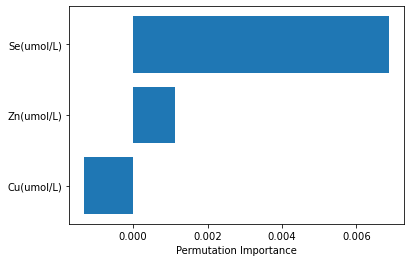

In [58]:
perm_importance = permutation_importance(znsecuRFModel, X_test, y_test)

feature_names = [
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
               ]
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")